Tentativa: Robert Garcia da Silva

### Imagem de exemplo EDA

<b>Explicação Geral</b><br>

Ferramentas:

 No primeiro momento foi pensado em iniciar a exploração da imagem utilizando três bibliotecas da linguagem Python (Numpy, Pandas e sklearn).


Exploração:

 A primeira coisa a ser feita foi procurar entender um pouco as características da imagem, dessa forma ela foi carregada em um Array Numpy, sendo feito então: 

- Plotagem da imagem na tela;
- Exibição das dimensões da imagem;
- Exibição do array contendo a imagem.

A partir da primeira etapa foi encontrado a seguinte dimensão para a imagem: (704, 704, 4).
Geralmente, o que é uma observação relativa, muitas imagens que se trabalha podem ser econtradas no formato RGB, possuindo então três canais de cores (Red, Green, Blue). Observou-se que essa imagem está em um outro formato, empregou-se um tempo pesquisando-se outros formatos de imagem, como CMYK, para uma possível conversão do formato da imagem recebida para o formato RGB que é um formato mais intuítivo. Com o tempo disposto essa pesquisa e a conversão não se mostrou um caminho rápido para ser seguido, dessa forma foi continuada a exploração da imagem utilizando outras estruturas, DataFrame do Pandas, para se tentar identificar certos padrões, o que se mostrou uma soluçã mais rápida dado as informações referentes aos pixel da imagem no arquivo "Meteor Challenge".
<br><br>
As tarefas foram realizadas analisando-se os padrões da imagem utilizando-se um DataFrame Pandas. Uma possibilidade que se mostrou útil na exploração da imagem foi o emprego do algoritmo de clusterização <b>KMeans</b>, que se encontra no final do trabalho. 
    Outra técnica que se pensou em utilizar foi <b>PCA</b> para tentar reduzir algum rúido na imagem, obtendo-se então os componentes principais que melhor explicariam os dados. 

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster

In [2]:

#read image
image_1 = plt.imread('./meteor_challenge_01.png')


In [3]:

# Some functions

#Printa imagem na tela
def print_image(image, title='Image'):
    fig, axe = plt.subplots(figsize=(15,14))
    axe.imshow(image)
    axe.set_title(title)
    axe.axis('off')

    
#Obtém as coordenadas (x,y) de uma "image" que igualeam ao pixel em pixel_char. 
# Útil para pegar pixels que possuem o mesmo padrão.
def x_y_pixels_equal(image, pixel_char):
    x = np.array([])
    y = np.array([])

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(np.allclose(image[i][j],pixel_char)):
                x = np.append(x, j)
                y = np.append(y, i)
    
    return (x,y)



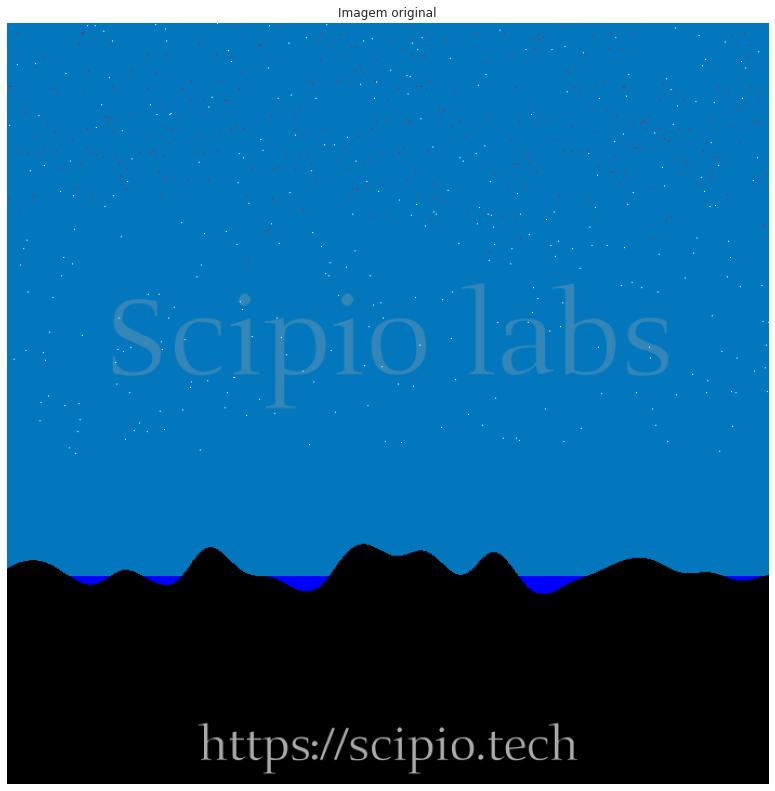

In [4]:

# show image
print_image(image_1, title='Imagem original')


In [5]:
dims = image_1.shape; dims

(704, 704, 4)

In [6]:

# Convertendo o array da imagem em um dataFrame para uma análise rápida de algumas características
image_vet = np.reshape(image_1, (dims[0]*dims[1], dims[2]))
image_df = pd.DataFrame(image_vet, columns=['C','M','Y','B']); image_df

,C,M,Y,B
0,0.007843,0.466667,0.741176,1.0
1,0.007843,0.466667,0.741176,1.0
2,0.007843,0.466667,0.741176,1.0
3,0.007843,0.466667,0.741176,1.0
4,0.007843,0.466667,0.741176,1.0
...,...,...,...,...
495611,0.000000,0.000000,0.000000,1.0
495612,0.000000,0.000000,0.000000,1.0
495613,0.000000,0.000000,0.000000,1.0
495614,0.000000,0.000000,0.000000,1.0


In [7]:
#Informações gerais sobre cada pixel da imagem
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495616 entries, 0 to 495615
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C       495616 non-null  float32
 1   M       495616 non-null  float32
 2   Y       495616 non-null  float32
 3   B       495616 non-null  float32
dtypes: float32(4)
memory usage: 7.6 MB


In [8]:

#Explorando padrões na imagem. Foram realizados vários testes para identificar os padrões gerais.
image_df.value_counts()[0:20]  #Pegando os 20 primeiros pixels que mais se repetem na imagem. 

C         M         Y         B  
0.007843  0.466667  0.741176  1.0    343695
0.000000  0.000000  0.000000  1.0    135875
0.200000  0.525490  0.717647  1.0      7261
0.000000  0.000000  1.000000  1.0      1535
0.666667  0.666667  0.666667  1.0      1268
1.000000  0.000000  0.000000  1.0       328
          1.000000  1.000000  1.0       315
0.047059  0.478431  0.737255  1.0       140
0.180392  0.517647  0.717647  1.0       121
0.003922  0.003922  0.003922  1.0       116
0.019608  0.470588  0.741176  1.0       113
0.027451  0.470588  0.737255  1.0       103
0.011765  0.470588  0.741176  1.0       100
0.054902  0.482353  0.737255  1.0        96
0.035294  0.474510  0.737255  1.0        94
0.392157  0.392157  0.392157  1.0        87
0.043137  0.478431  0.737255  1.0        86
0.098039  0.494118  0.733333  1.0        77
0.254902  0.254902  0.254902  1.0        73
0.196078  0.521569  0.713726  1.0        72
dtype: int64

Utilizando e testando os padrões de pixels que mais se repetiram pelo uso da função "value_counts" acima, conseguiu-se separar os pixels que representam cada elemento da imagem. Tendo-se então:

- Pixel com características [0.007843  0.466667  0.741176  1.0] representando o céu.<br>
- Pixel com características [0.007843  0.466667  0.741176  1.0] representando a terra.<br>
- Pixel com características [0.200000  0.525490  0.717647  1.0] representando a frase em destaque no céu.<br>
- Pixel com características [0.000000  0.000000  1.000000  1.0] representando os lagos.<br>
- Pixel com cacacterísticas [0.666667  0.666667  0.666667  1.0] representando a frase em destaque na terra.<br>
- Pixel com cacacterísticas [1.000000  0.000000  0.000000  1.0] representando as Meteoros.<br>
- Pixel com cacacterísticas [1.000000  1.000000  1.000000  1.0] representando os Estrelas.<br>

Muitos outros padrões de pixels representam ruídos na imagem. 

### Task 1

<b>1.</b>    Count the number of Stars.

Tendo então: <b>315 Estrelas</b>.

In [9]:

pixels_stars = x_y_pixels_equal(image_1, np.array([1.000000, 1.000000, 1.000000,  1.0]))

In [10]:
pixels_stars[0].shape

(315,)

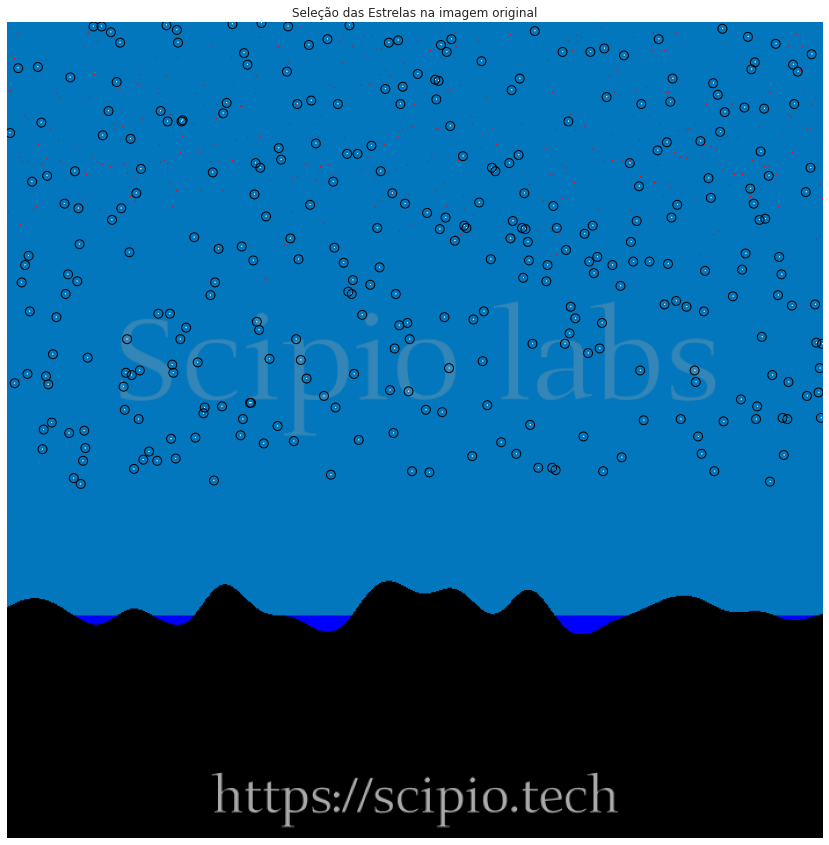

In [11]:

fig, axe = plt.subplots(1, figsize=(15,15))
axe.imshow(image_1)
axe.scatter(x=pixels_stars[0], y = pixels_stars[1], s=80, facecolors='none', edgecolors='black')
axe.axis('off')
axe.set_title('Seleção das Estrelas na imagem original')
plt.show()

### Task 2

<b>2.</b> Count the number of Meteors.

Tendo então: <b>328 Meteoros</b>.

In [12]:
pixels_meteors = x_y_pixels_equal(image_1, np.array([1.000000,  0.000000,  0.000000,  1.0]))

In [13]:
pixels_meteors[0].shape

(328,)

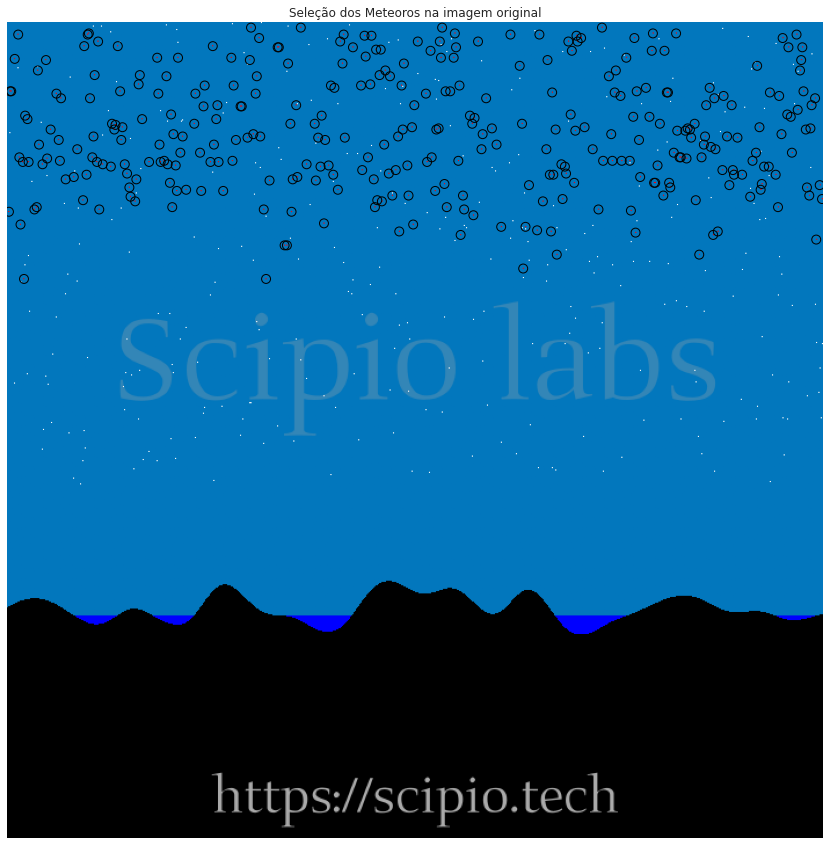

In [14]:
fig, axe = plt.subplots(1, figsize=(15,15))
axe.imshow(image_1)
axe.scatter(x=pixels_meteors[0], y = pixels_meteors[1], s=80, facecolors='none', edgecolors='black')
axe.axis('off')
axe.set_title('Seleção dos Meteoros na imagem original')
plt.show()

### Task 3

<b>3.</b> If the Meteors are falling perpendicularly to the Ground (Water level), count how many will fall on the Water.

Tendo: <b>105</b>.

In [15]:
pixels_lagos = x_y_pixels_equal(image_1, np.array([0.000000,  0.000000,  1.000000,  1.0]))

In [16]:

# A ideia usada foi meio que projetar a componente x de cada meteor nas componentes x dos lagos, pegando quando
# os componentes são iguais. 
count = 0
for meteor_x in pixels_meteors[0]:
    for lago_x in pixels_lagos[0]:
        if(meteor_x == lago_x):
            count+=1
            break

print('Número de meteoros que atingem os lagos caso caíam de forma perpendicular:', count)

Número de meteoros que atingem os lagos caso caíam de forma perpendicular: 105


### Task 4

Ainda quebrando a cabeça em como obter...

### Outras tentativas, applying KMeans

In [17]:
model_kmeans = cluster.KMeans(8) # Aplicando 8 clusters
clusters = model_kmeans.fit_predict(image_vet)

In [18]:
pd.value_counts(clusters)

1    345461
0    136518
2      8655
3      1900
4      1535
6       904
5       328
7       315
dtype: int64

In [19]:
clustered_image = np.reshape(clusters, (dims[0], dims[1]))

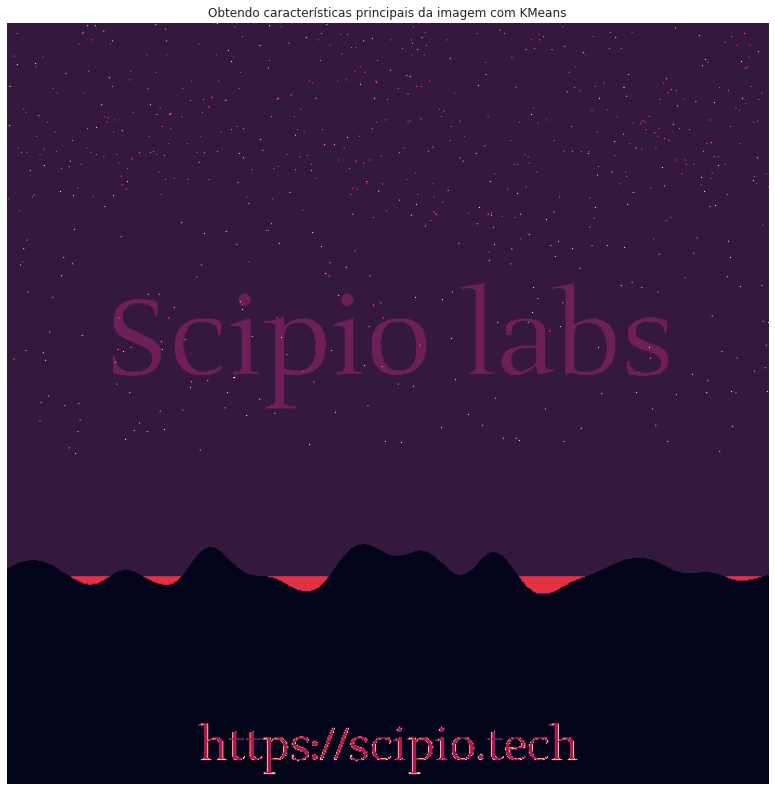

In [20]:
print_image(clustered_image, title='Obtendo características principais da imagem com KMeans')

Podemos observar que o KMeans consegue identificar bem vários componentes de interesse na imagem, como a quantidade de Meteoros e Estrelas.

### Principais referências

[1]https://scikit-learn.org/stable/modules/clustering.html#k-means<br>
[2]https://stackoverflow.com/questions/7670112/finding-a-subimage-inside-a-numpy-image<br>
[3]https://qastack.com.br/programming/4143502/how-to-do-a-scatter-plot-with-empty-circles-in-python<br>
[4]https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html<br>
[5]https://numpy.org/doc/stable/reference/generated/numpy.allclose.html<br>
[6]https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise<br>
[7]https://stackoverflow.com/questions/7670112/finding-a-subimage-inside-a-numpy-image<br>
[8]https://stackoverflow.com/questions/14088375/how-can-i-convert-rgb-to-cmyk-and-vice-versa-in-python<br>
[9]https://en.wikipedia.org/wiki/CMYK_color_model<br>
[10]https://pt.wikipedia.org/wiki/RGB<br>
[11]https://www.ginifab.com/feeds/pms/cmyk_to_rgb.php<br>
[12]https://drive.google.com/drive/u/1/folders/1RpDaWdLMHJMBvolbSENzCAtdhQ0fgmNo<br>